In [1]:
import pandas as pd
import bt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import talib

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
def header(heading):
    print(heading)
def divider():
    print("--------------")

In [4]:
country_code = 'USA'

## Alternate Dataset - Inflation Dataset
Data Downloaded from "https://data.worldbank.org/indicator/FR.INR.RINR?locations=US" 
<br/>Loaded into a pandas dataset & Visualize the Inflation of United States over the years

In [5]:
# Inflation Data for all countries
raw_inflation_data = pd.read_excel('./data/country_inflation_data.xls', skiprows=3)
raw_inflation_data.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code'], inplace=True)

### Santize the data

In [6]:
# Structure the Data so that it can be interpreted easily
df_inflation_data = pd.melt(raw_inflation_data, id_vars=['Country Code'], var_name="Year", value_name="Inflation")
df_inflation_data.index = df_inflation_data['Country Code']
df_inflation_data['Year'] = df_inflation_data['Year'].astype('int')
df_inflation_data = df_inflation_data[df_inflation_data['Year'] > 1979]
df_inflation_data.drop(columns=['Country Code'], inplace=True)
df_inflation_data.dropna(inplace=True)
df_inflation_data.head(5)

,Year,Inflation
Country Code,,
AFE,1980,15.066512
ARB,1980,9.626057
AUS,1980,10.135841
AUT,1980,6.328325
BDI,1980,2.498520


### Plot of US Inflation Over the Years

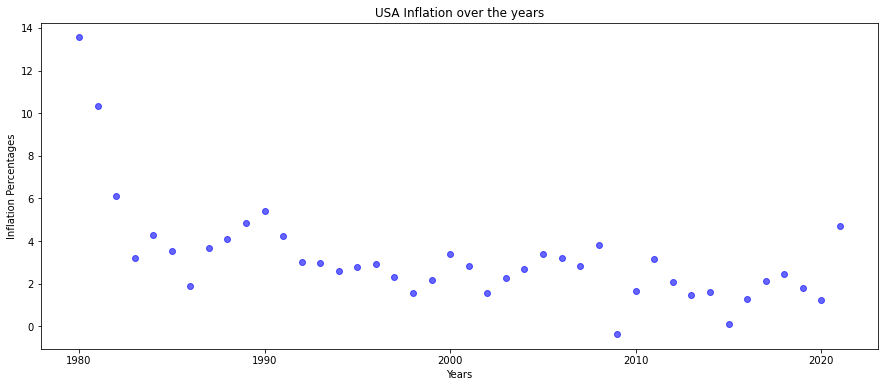

In [7]:
plt.figure(figsize=(15,6))
usa_inflation_data = df_inflation_data.loc[country_code][['Year','Inflation']]
plt.title("USA Inflation over the years")
plt.xlabel('Years')
plt.ylabel('Inflation Percentages')
plt.scatter(data=usa_inflation_data, x='Year', y='Inflation', color='blue', alpha=0.6)
plt.show()


## Interest Rates Dataset
How has the Federal Reserve responded to the Inflationary Pressures?<br/>
It can come evident from the interest rate dataset.<br/>
Loading the interest rate database and visually Ploting them<br/>
Data Downloaded from https://data.worldbank.org/indicator/FR.INR.RINR?locations=US


In [8]:
# Inflation Data for all countries
raw_interest_data = pd.read_excel('./data/country_interest_rates.xls', skiprows=3)
raw_interest_data.drop(columns=['Country Name', 'Indicator Name', 'Indicator Code'], inplace=True)

### Santize the data

In [9]:
# Structure the Data so that it can be interpreted easily
df_interest_data = pd.melt(raw_interest_data, id_vars=['Country Code'], var_name="Year", value_name="InterestRates")
df_interest_data.index = df_interest_data['Country Code']
df_interest_data['Year'] = df_interest_data['Year'].astype('int')
df_interest_data = df_interest_data[df_interest_data['Year'] > 1979]
df_interest_data.drop(columns=['Country Code'], inplace=True)
df_interest_data.dropna(inplace=True)
df_interest_data.tail(5)

,Year,InterestRates
Country Code,,
VUT,2020,0.277822
WSM,2020,8.471778
ZAF,2020,2.313127
ZMB,2020,-3.749081
ZWE,2020,-79.803157


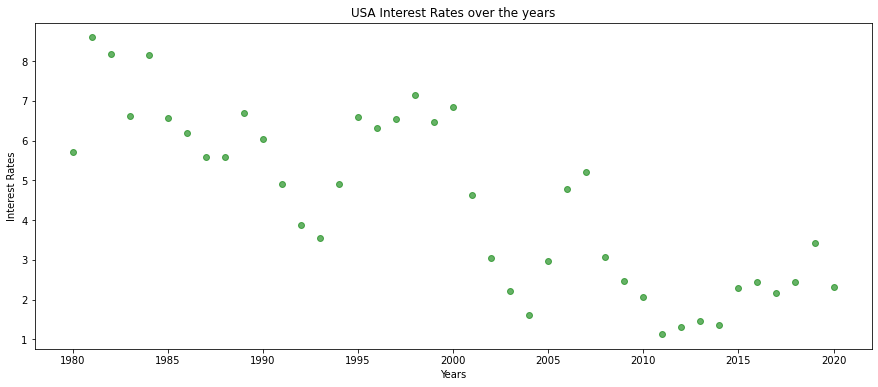

In [10]:
# Inflation Data for USA
plt.figure(figsize=(15,6))
usa_interest_data = df_interest_data.loc[country_code][['Year','InterestRates']]
plt.title("USA Interest Rates over the years")
plt.xlabel('Years')
plt.ylabel('Interest Rates')
plt.scatter(data=usa_interest_data, x='Year', y='InterestRates', color='green', alpha=0.6)
plt.show()


### Merge Inflation and Interest Rate Datasets 
Merging interest rates and inflation data in to a single dataframe so that we can fetch the correlation

In [11]:
usa_inflation_interest_df = pd.merge(usa_inflation_data, usa_interest_data, on=["Year"])
usa_inflation_interest_df.index = usa_inflation_interest_df['Year']
usa_inflation_interest_df['Interest_Rate_Next_Year'] = usa_inflation_interest_df["Year"].apply(lambda x: (usa_inflation_interest_df.loc[x+1]["InterestRates"]) if x < 2020 else 0.0)
usa_inflation_interest_df = usa_inflation_interest_df.drop(columns=['Year'])
usa_inflation_interest_df['Interest_Rate_Next_Year'] = usa_inflation_interest_df['Interest_Rate_Next_Year'].astype("float")
usa_inflation_interest_df.head(5)


,Inflation,InterestRates,Interest_Rate_Next_Year
Year,,,
1980,13.549202,5.716390,8.594620
1981,10.334715,8.594620,8.177347
1982,6.131427,8.177347,6.618160
1983,3.212435,6.618160,8.141088
1984,4.300535,8.141088,6.563327


In [12]:
inflation_interest_correlation = usa_inflation_interest_df.corr(method='pearson')
inflation_interest_correlation

,Inflation,InterestRates,Interest_Rate_Next_Year
Inflation,1.000000,0.499086,0.591156
InterestRates,0.499086,1.000000,0.866936
Interest_Rate_Next_Year,0.591156,0.866936,1.000000


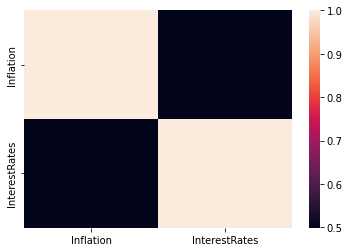

In [13]:
# Plot the heatmap signifying the correlation between Inflation & Interest Rates
sns.heatmap(usa_inflation_interest_df[['Inflation', 'InterestRates']].corr())
plt.show()

### Correlation between interest rates and inflation

We don't see a  string correlation between interest rates and inflation and infact we see some cases same side movement and in some cases an opposite movement as depicted in the graph below

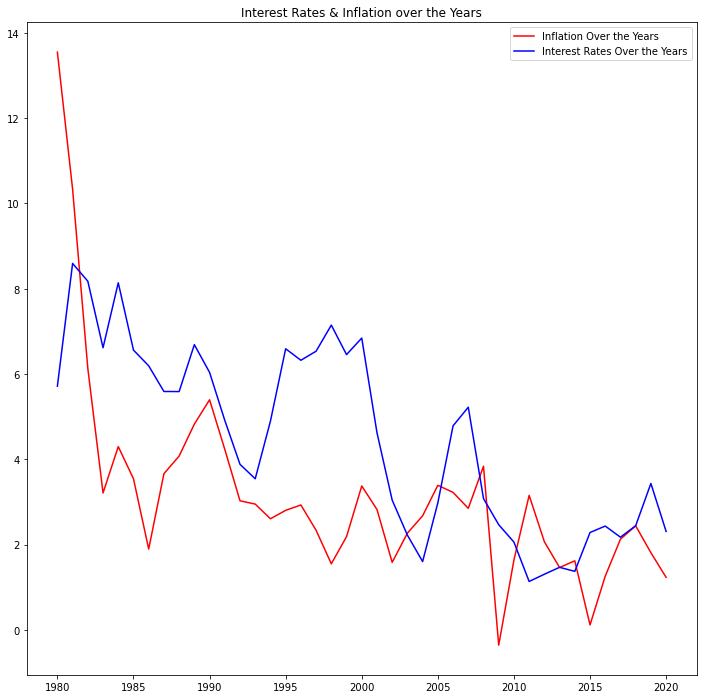

In [14]:
plt.figure(figsize=(12,12))
plt.plot(usa_inflation_interest_df['Inflation'], color='red', label='Inflation Over the Years')
plt.plot(usa_inflation_interest_df['InterestRates'], color='blue', label='Interest Rates Over the Years')
plt.title("Interest Rates & Inflation over the Years")
plt.legend()
plt.show()

In [15]:
# Top 3 Stocks
raw_stocks_data = pd.read_excel('./data/sp500_historic_data.xlsx')
raw_stocks_data['Top3'] = raw_stocks_data['Top3'].apply(
    lambda s: ",".join(s.split(',')[0:3]) if(len(s.split(',')) > 3) else s )
raw_stocks_data

,Year,Top3
0,1970,"xom,f,ge"
1,1971,"xom,f,ge"
2,1972,"xom,f,ge"
3,1973,"xom,f,ge"
4,1974,"xom,f,ge"
5,1975,"xom,f,ge"
6,1976,"xom,f,ibm"
7,1977,"xom,f,ibm"
8,1978,"xom,f,ibm"
9,1979,"xom,f,ibm"


In [16]:
usa_inflation_interest_df = pd.merge(usa_inflation_interest_df, raw_stocks_data, on=["Year"])
usa_inflation_interest_df.head(10)

,Year,Inflation,InterestRates,Interest_Rate_Next_Year,Top3
0,1980,13.549202,5.716390,8.594620,"xom,f,ibm"
1,1981,10.334715,8.594620,8.177347,"xom,f,ibm"
2,1982,6.131427,8.177347,6.618160,"xom,f,ibm"
3,1983,3.212435,6.618160,8.141088,"xom,f,ibm"
4,1984,4.300535,8.141088,6.563327,"xom,f,ibm"
5,1985,3.545644,6.563327,6.193860,"xom,f,ibm"
6,1986,1.898048,6.193860,5.592238,"xom,f,ibm"
7,1987,3.664563,5.592238,5.590382,"xom,f,ibm"
8,1988,4.077741,5.590382,6.690687,"xom,f,ibm"
9,1989,4.827003,6.690687,6.039749,"f,xom,ibm"


## Constants

In [17]:
index_tickers = '^GSPC, ^IXIC'
index_ticker_column_mapper = {'gspc': 'SP500', 'ixic': 'Nasdaq'}
target_inflation_metric = '7'
start_date = '1980-01-01'

## Indexes Investment Strategy
### Allocating portfolio across S&P 500, Nasdaq companies

S&P 500 - Top 500 Companies in US Markets launched in 1923 tracking 90 stocks, expanded to 500 stocks from 1957


In [18]:
def fetch_price_data(tickers, start_date):
    raw_price_data = bt.get(tickers, start = start_date)
    return raw_price_data

def fetch_price_data_range(tickers, start_date, end_date):
    raw_price_data = bt.get(tickers, start = start_date, end=end_date)
    return raw_price_data

In [19]:
# Price Data for the two indices SP500 & Nasdaq index.
price_data = fetch_price_data(index_tickers, start_date)
price_data.rename(columns = index_ticker_column_mapper, inplace=True)
price_data.head()

,SP500,Nasdaq
Date,,
1980-01-02,105.760002,148.169998
1980-01-03,105.220001,145.970001
1980-01-04,106.519997,148.020004
1980-01-07,106.809998,148.619995
1980-01-08,108.949997,150.679993


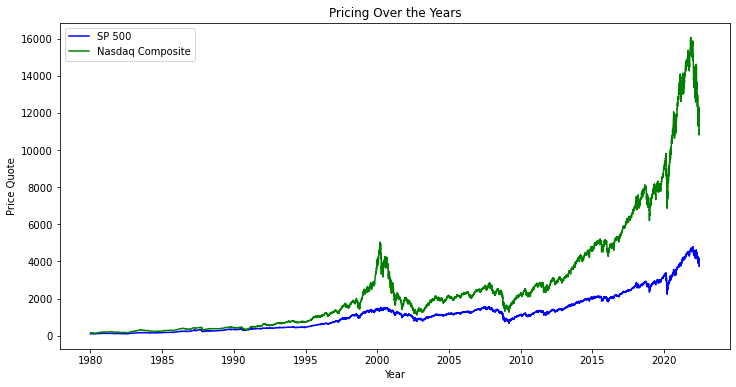

In [20]:
# Plot Price Data
plt.figure(figsize=(12,6))
plt.xlabel("Year")
plt.ylabel("Price Quote")
plt.title('Pricing Over the Years')
plt.plot(price_data['SP500'], color='blue', label='SP 500')
plt.plot(price_data['Nasdaq'], color='green', label='Nasdaq Composite')
plt.legend()
plt.show()

### Merge Inflation, Interest Rates data with SP500 and Nasdaq Pricing Data

In [21]:
price_data['year'] = pd.DatetimeIndex(price_data.index).year
year_wise_df = price_data.groupby(by='year').agg(
    {'SP500' : 'mean', 'Nasdaq': 'mean'})
year_wise_df['Year'] = year_wise_df.index
year_wise_df = pd.merge(usa_inflation_interest_df, 
                        year_wise_df, 
                        on=["Year"])

In [22]:
year_wise_df.head()

,Year,Inflation,InterestRates,Interest_Rate_Next_Year,Top3,SP500,Nasdaq
0,1980,13.549202,5.716390,8.594620,"xom,f,ibm",118.710118,168.608379
1,1981,10.334715,8.594620,8.177347,"xom,f,ibm",128.037905,203.182371
2,1982,6.131427,8.177347,6.618160,"xom,f,ibm",119.705732,188.972886
3,1983,3.212435,6.618160,8.141088,"xom,f,ibm",160.473122,285.427786
4,1984,4.300535,8.141088,6.563327,"xom,f,ibm",160.463557,248.977707


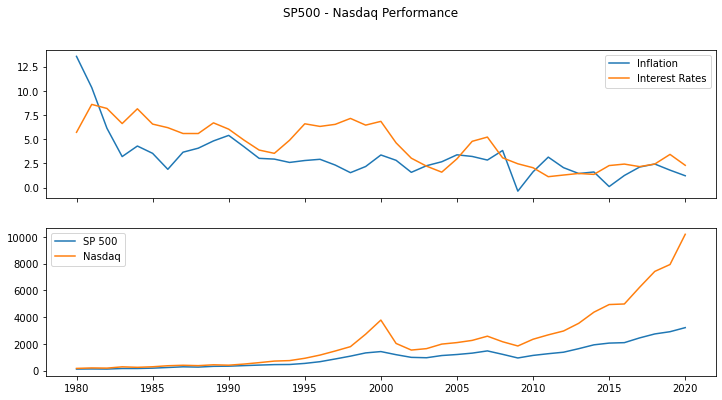

In [23]:
fig, axs = plt.subplots(2, figsize=(12,6))
fig.figsize = (24,25)
fig.suptitle('SP500 - Nasdaq Performance')
axs[1].plot(year_wise_df['Year'], year_wise_df['SP500'], label='SP 500')
axs[1].plot(year_wise_df['Year'], year_wise_df['Nasdaq'], label='Nasdaq')
axs[1].legend()
axs[0].plot(year_wise_df['Year'], year_wise_df['Inflation'], label = 'Inflation')
axs[0].plot(year_wise_df['Year'], year_wise_df['InterestRates'], label='Interest Rates')
axs[0].legend()

for ax in fig.get_axes():
    ax.label_outer()
plt.show()

##### Graph Inference

From the Graphs, we see a strong correlation with interest rates, inflation along 
the stock market movement. We can do a prediction of stock market direction infering
from the inflation and interest rates movement.

### Trading Strategies

#### Equal Weight Strategy

We have our bt algos to run monthly and select all indices and weighing equally

In [24]:
equal_weight_strategy = bt.Strategy('Equal_Weight',
                            [
                              bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()
                            ])

In [25]:
inverse_volatility_strategy = bt.Strategy('Inverse_Volatility',
                            [
                              bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighInvVol(),
                              bt.algos.Rebalance()
                            ])

In [26]:
top3_strategy = bt.Strategy('Top3',
                            [
                              bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighInvVol(),
                              bt.algos.Rebalance()
                            ])

In [27]:
strategy_lst = [equal_weight_strategy, inverse_volatility_strategy, top3_strategy]

## Interest Rate Based Trading Strategy

In [28]:
def interest_based_strategy_computation(strategies, target_interest_metric = -1):

    # Initialize empty lists
    lst_interest = []
    lst_year = []
    lst_cagr = []
    lst_sharpe = []
    lst_sortino = []
    lst_strategy = []

    for bt_strategy in strategies:
        target_year_list = []
        if target_interest_metric == -1:
            target_year_list = range(1980, 2020)
        else:   
            interest_from, interest_to = int(target_interest_metric), round(target_interest_metric)
            if(interest_from == interest_to):
                interest_to = interest_from + 1

            # Target Years Based on the Interest Rates
            target_years = year_wise_df[year_wise_df['InterestRates'].between(interest_from, interest_to)][
                'Year'].sort_values(ascending=False)
            target_year_list = target_years.to_list()

        # Run a loop across target
        for yr in target_years:
            start_date = str(yr) + '-01-01'
            end_date = str((yr+1)) + '-01-01'
            try:
                if (bt_strategy.name == 'Top3'):
                    top3codes = usa_inflation_interest_df[usa_inflation_interest_df['Year']==yr]['Top3'].to_string(index=False)
                    price_data = bt.get(top3codes, start=start_date, end=end_date)
                else:
                    price_data = fetch_price_data_range(index_tickers, start_date, end_date)

                bt_backtest = bt.Backtest(bt_strategy, price_data)
                bt_res = bt.run(bt_backtest)

                #bt_res.plot(title=bt_strategy.name)
                #plt.show()

                bt_stats = bt_res.stats
                lst_interest.append(target_interest_metric)
                lst_strategy.append(bt_strategy.name)
                lst_year.append(yr)
                lst_cagr.append(round(bt_stats.loc['cagr'][bt_strategy.name] * 100, 2))
                lst_sharpe.append(round(bt_stats.loc['daily_sharpe'][bt_strategy.name], 2))
                lst_sortino.append(round(bt_stats.loc['daily_sortino'][bt_strategy.name], 2))
            except:
                print('Error ', yr, ' - ', bt_strategy.name)

    return pd.DataFrame(list(zip(lst_interest, lst_strategy, lst_year, lst_cagr, lst_sharpe, lst_sortino)), columns=['Interest Rate', 'strategy_name', 'year', 'cagr', 'sharpe', 'sortino'])


In [29]:
def interest_rate_stock_parameters():
    interest_strategy_df = pd.DataFrame(columns=['Interest Rate', 'strategy_name', 'year', 'cagr', 'sharpe', 'sortino'])
    for item in range(1, 12):
        df2 = interest_based_strategy_computation(strategy_lst, item)
        interest_strategy_df = pd.concat([interest_strategy_df, df2])
    interest_strategy_df = interest_strategy_df.reset_index()
    interest_rate_stock_analysis_df = pd.pivot_table(interest_strategy_df, values=['cagr', 'sharpe', 'sortino'], index=['Interest Rate', 'strategy_name'],
                        aggfunc={'cagr': np.mean,
                                 'sharpe': np.mean,
                                 'sortino': np.mean
                                }).reset_index()
    return interest_rate_stock_analysis_df



In [30]:
def plot_heatmap(dataframe, index_vars, values, plttitle, aggfn=np.mean, ):
    pvt = pd.pivot_table(dataframe, index=index_vars,
                    values=values, aggfunc=np.mean)
    # Plot CAGR Pivot Table
    plt.figure(figsize=(12,5))
    plt.title(plttitle)
    sns.heatmap(pvt, cmap="RdBu")
    plt.show()

In [31]:
interest_rate_stock_analysis_df = interest_rate_stock_parameters()
# Strategy Based Dataframe
equal_weight_strategy_df = interest_rate_stock_analysis_df[interest_rate_stock_analysis_df['strategy_name'] == 'Equal_Weight']
inverse_volatility_strategy_df = interest_rate_stock_analysis_df[interest_rate_stock_analysis_df['strategy_name'] == 'Inverse_Volatility']
top3_strategy_df = interest_rate_stock_analysis_df[interest_rate_stock_analysis_df['strategy_name'] == 'Top3']

Error  2015  -  Top3
Error  2009  -  Top3
Error  2008  -  Equal_Weight
Error  1992  -  Equal_Weight
Error  2008  -  Inverse_Volatility
Error  1992  -  Inverse_Volatility
Error  2008  -  Top3
Error  2002  -  Top3


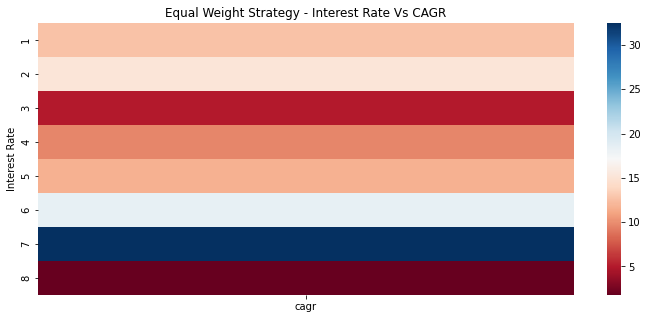

In [32]:
plot_heatmap(equal_weight_strategy_df, ['Interest Rate'], ['cagr'], 'Equal Weight Strategy - Interest Rate Vs CAGR')

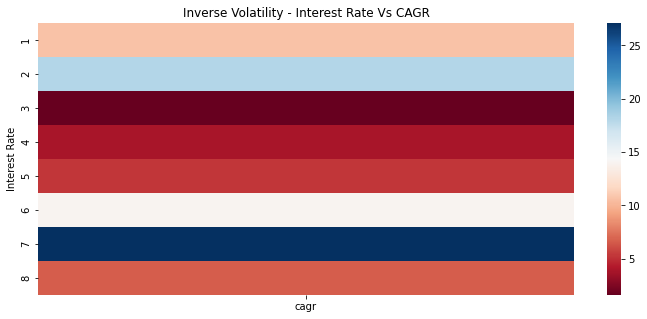

In [33]:
plot_heatmap(inverse_volatility_strategy_df, ['Interest Rate'], ['cagr'], 'Inverse Volatility - Interest Rate Vs CAGR')

In [34]:
interest_rate_stock_analysis_df

,Interest Rate,strategy_name,cagr,sharpe,sortino
0,1,Equal_Weight,12.674000,1.038000,1.726000
1,1,Inverse_Volatility,10.668000,0.952000,1.562000
2,1,Top3,11.290000,0.942000,1.598000
3,2,Equal_Weight,15.182222,0.898889,1.493333
4,2,Inverse_Volatility,18.100000,1.065556,1.798889
5,2,Top3,12.651429,0.882857,1.607143
6,3,Equal_Weight,4.980000,0.756667,1.136667
7,3,Inverse_Volatility,1.616667,0.563333,0.800000
8,3,Top3,12.256667,0.926667,1.573333
9,4,Equal_Weight,9.625000,0.760000,1.372500


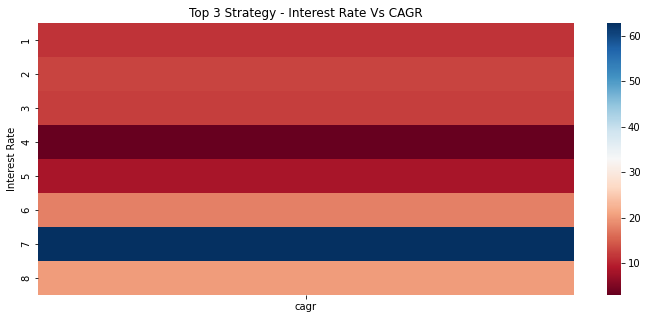

In [35]:
plot_heatmap(top3_strategy_df, ['Interest Rate'], ['cagr'], 'Top 3 Strategy - Interest Rate Vs CAGR')

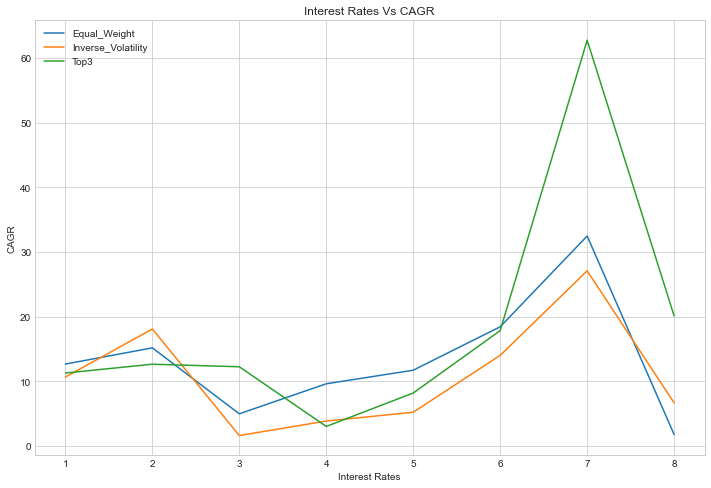

In [36]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12,8))
    plt.plot(equal_weight_strategy_df['Interest Rate'], 
             equal_weight_strategy_df['cagr'], 
             label='Equal_Weight')
    plt.plot(inverse_volatility_strategy_df['Interest Rate'], 
             inverse_volatility_strategy_df['cagr'], 
             label='Inverse_Volatility')
    plt.plot(top3_strategy_df['Interest Rate'], 
             top3_strategy_df['cagr'], 
             label='Top3')
    plt.xlabel('Interest Rates')
    plt.ylabel('CAGR')
    plt.title('Interest Rates Vs CAGR')
    plt.legend()
    plt.show()
plt.show()



### Overall Interest Rate based Strategy Stats

In [37]:
interest_rate_stock_analysis_df

,Interest Rate,strategy_name,cagr,sharpe,sortino
0,1,Equal_Weight,12.674000,1.038000,1.726000
1,1,Inverse_Volatility,10.668000,0.952000,1.562000
2,1,Top3,11.290000,0.942000,1.598000
3,2,Equal_Weight,15.182222,0.898889,1.493333
4,2,Inverse_Volatility,18.100000,1.065556,1.798889
5,2,Top3,12.651429,0.882857,1.607143
6,3,Equal_Weight,4.980000,0.756667,1.136667
7,3,Inverse_Volatility,1.616667,0.563333,0.800000
8,3,Top3,12.256667,0.926667,1.573333
9,4,Equal_Weight,9.625000,0.760000,1.372500


In [38]:
interest_master_data = usa_interest_data.copy()
interest_master_data["Interest Rate"] = interest_master_data["InterestRates"].apply(lambda x: int(x))
interest_master_data.drop(columns=["InterestRates"], inplace=True)

In [39]:
interest_rate_stock_analysis_df = pd.merge(interest_master_data, 
             interest_rate_stock_analysis_df,
             on=['Interest Rate']
            )
interest_rate_stock_analysis_df

,Year,Interest Rate,strategy_name,cagr,sharpe,sortino
0,1980,5,Equal_Weight,11.7225,0.8250,1.2875
1,1980,5,Inverse_Volatility,5.2225,0.5600,0.9000
2,1980,5,Top3,8.1950,0.5475,0.9075
3,1987,5,Equal_Weight,11.7225,0.8250,1.2875
4,1987,5,Inverse_Volatility,5.2225,0.5600,0.9000
...,...,...,...,...,...,...
118,2013,1,Inverse_Volatility,10.6680,0.9520,1.5620
119,2013,1,Top3,11.2900,0.9420,1.5980
120,2014,1,Equal_Weight,12.6740,1.0380,1.7260
121,2014,1,Inverse_Volatility,10.6680,0.9520,1.5620


In [40]:
interest_max_returns_df = pd.pivot_table(interest_rate_stock_analysis_df, values=['cagr'], index=['Year'],
                   aggfunc={'cagr': max})
# Calculate the CAGR Returns based on Interest Rate Based Strategy
interest_rate_strategy_cagr = interest_max_returns_df['cagr'].mean()
print('CAGR by choosing the best strategy based on Interest Rates -> %2F%%' 
      % interest_rate_strategy_cagr)

CAGR by choosing the best strategy based on Interest Rates -> 16.598618%


## Inflation Based Trading Strategy

In [41]:
def inflation_based_strategy_computation(strategies, target_inflation_metric = -1):
    
    if target_inflation_metric == 8:
        # We don't have data Inflation @ 8. 
        # Inflation 9 - unique data case so letz set inflation metric to 10
        computed_target_inflation_metric = 10
    else:
        computed_target_inflation_metric = target_inflation_metric
    
    # Initialize empty lists
    lst_inflation = []
    lst_year = []
    lst_cagr = []
    lst_sharpe = []
    lst_sortino = []
    lst_strategy = []

    for bt_strategy in strategies:
        
        target_year_list = []
        if target_inflation_metric == -1:
            target_year_list = range(1974, 2022)
        else:
            inflation_from, inflation_to = int(computed_target_inflation_metric), round(computed_target_inflation_metric)
            if(inflation_from == inflation_to):
                inflation_to = inflation_from + 1

            # Target Years Based on the Interest Rates
            target_years = year_wise_df[year_wise_df['Inflation'].between(inflation_from, inflation_to)][
                'Year'].sort_values(ascending=False)
            target_year_list = target_years.to_list()
        

        # Run a loop across target
        for yr in target_years:
            start_date = str(yr) + '-01-01'
            end_date = str((yr+1)) + '-01-01'
            
            try:
                                            
                if (bt_strategy.name == 'Top3'):
                    top3codes = usa_inflation_interest_df[usa_inflation_interest_df['Year']==yr]['Top3'].to_string(index=False)
                    price_data = bt.get(top3codes, start=start_date, end=end_date)
                else:
                    price_data = fetch_price_data_range(index_tickers, start_date, end_date)

                bt_backtest = bt.Backtest(bt_strategy, price_data)
                bt_res = bt.run(bt_backtest)

                #bt_res.plot(title="Index Equal Weight Strategy")
                #plt.show()

                bt_stats = bt_res.stats
                lst_inflation.append(target_inflation_metric)
                lst_strategy.append(bt_strategy.name)


                lst_year.append(yr)
                lst_cagr.append(round(bt_stats.loc['cagr'][bt_strategy.name] * 100, 2))
                lst_sharpe.append(round(bt_stats.loc['daily_sharpe'][bt_strategy.name], 2))
                lst_sortino.append(round(bt_stats.loc['daily_sortino'][bt_strategy.name], 2))
            
            except:
                print('Error ', yr, ' - ', bt_strategy.name)

    return pd.DataFrame(list(zip(lst_inflation, lst_strategy, lst_year, lst_cagr, lst_sharpe, lst_sortino)),
                     columns=['Inflation', 'strategy_name', 'year', 'cagr', 'sharpe', 'sortino'])


In [42]:
def inflation_rate_stock_parameters():
    inflation_strategy_df = pd.DataFrame(columns=['Inflation', 'strategy_name', 'year', 'cagr', 'sharpe', 'sortino'])
    for item in range(1, 12):
        df2 = inflation_based_strategy_computation(strategy_lst, item)
        inflation_strategy_df = pd.concat([inflation_strategy_df, df2])
    # Inflation Strategy Dataframe
    inflation_strategy_df = pd.pivot_table(inflation_strategy_df, values=['cagr', 'sharpe', 'sortino'], index=['Inflation', 'strategy_name'],
                    aggfunc={'cagr': np.mean,
                             'sharpe': np.mean,
                             'sortino': np.mean
                            }).reset_index()
    return inflation_strategy_df


In [43]:
inflation_rate_stock_analysis_df = inflation_rate_stock_parameters()

equal_weight_strategy_df = inflation_rate_stock_analysis_df[inflation_rate_stock_analysis_df['strategy_name'] == 'Equal_Weight']
inverse_volatility_strategy_df = inflation_rate_stock_analysis_df[inflation_rate_stock_analysis_df['strategy_name'] == 'Inverse_Volatility']
top3_strategy_df = inflation_rate_stock_analysis_df[inflation_rate_stock_analysis_df['strategy_name'] == 'Top3']


In [44]:
inflation_rate_stock_analysis_df.head(6)

,Inflation,strategy_name,cagr,sharpe,sortino
0,1,Equal_Weight,15.854444,1.035556,1.617778
1,1,Inverse_Volatility,15.294444,1.066667,1.660000
2,1,Top3,18.480000,1.130000,1.903333
3,2,Equal_Weight,16.365385,1.172308,1.989231
4,2,Inverse_Volatility,12.146923,0.981538,1.679231
5,2,Top3,15.432308,1.032308,1.841538


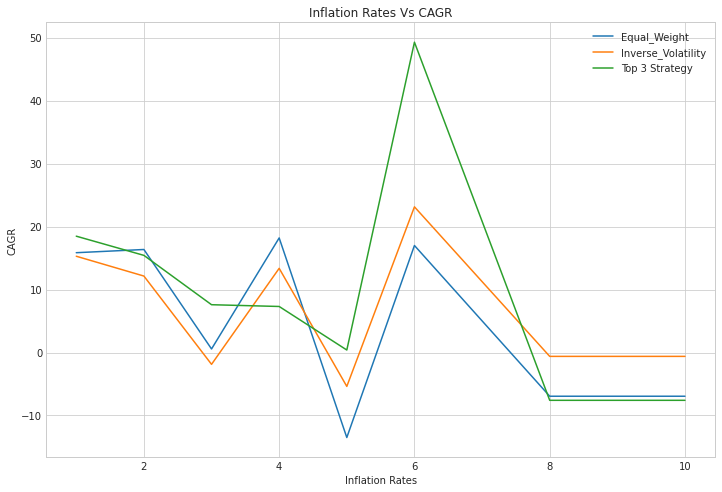

In [45]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12,8))
    plt.plot(equal_weight_strategy_df['Inflation'], 
             equal_weight_strategy_df['cagr'], 
             label='Equal_Weight')
    plt.plot(inverse_volatility_strategy_df['Inflation'], 
             inverse_volatility_strategy_df['cagr'], 
             label='Inverse_Volatility')
    plt.plot(top3_strategy_df['Inflation'], 
             top3_strategy_df['cagr'], 
             label='Top 3 Strategy')
    plt.xlabel('Inflation Rates')
    plt.ylabel('CAGR')
    plt.title('Inflation Rates Vs CAGR')
    plt.legend()
plt.show()

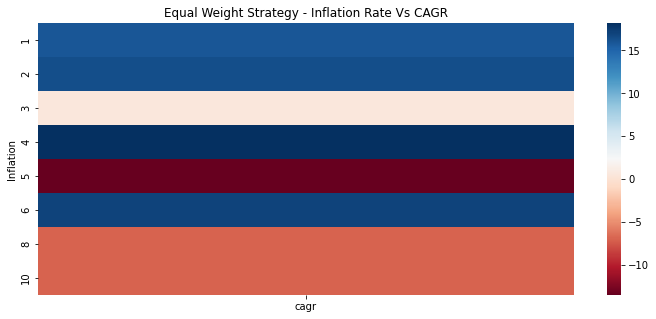

In [46]:
plot_heatmap(equal_weight_strategy_df, ['Inflation'], ['cagr'], 'Equal Weight Strategy - Inflation Rate Vs CAGR')


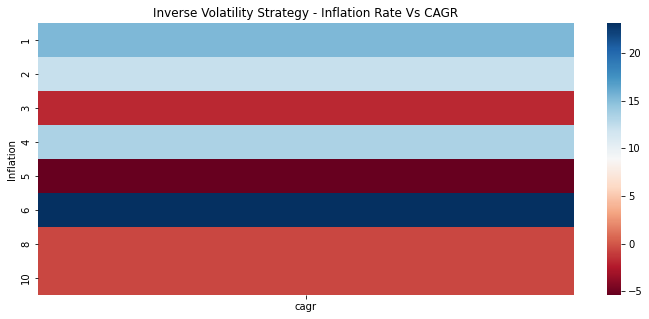

In [47]:
plot_heatmap(inverse_volatility_strategy_df, ['Inflation'], ['cagr'], 'Inverse Volatility Strategy - Inflation Rate Vs CAGR')


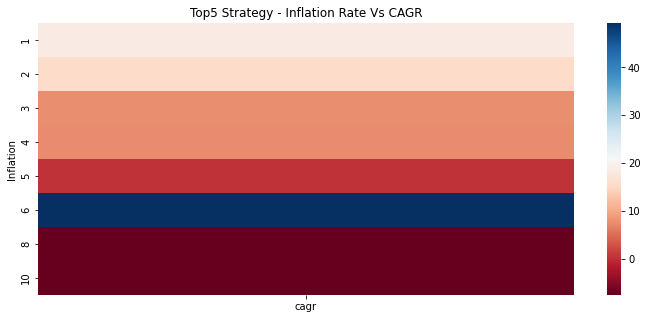

In [48]:
plot_heatmap(top3_strategy_df, ['Inflation'], ['cagr'], 'Top5 Strategy - Inflation Rate Vs CAGR')


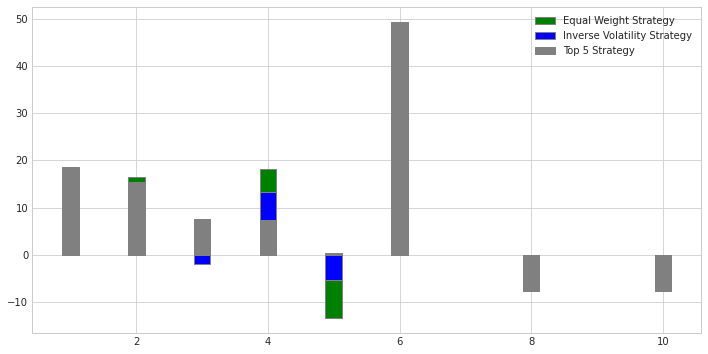

In [49]:
with plt.style.context('seaborn-whitegrid'):

    plt.figure(figsize=(12,6))

    barWidth = 0.25

    plt.bar(equal_weight_strategy_df['Inflation'], 
            equal_weight_strategy_df['cagr'],
            edgecolor ='gray',
            color='g', width=barWidth,
            label='Equal Weight Strategy')
    plt.bar(inverse_volatility_strategy_df['Inflation'], 
            inverse_volatility_strategy_df['cagr'],
            edgecolor ='gray',
            color='b', width=barWidth,
            label='Inverse Volatility Strategy')
    plt.bar(top3_strategy_df['Inflation'], 
            top3_strategy_df['cagr'],
            edgecolor ='gray',
            color='gray', width=barWidth,
            label='Top 5 Strategy')
    plt.legend()

plt.show()

In [50]:
inflation_master_data = usa_inflation_data.copy()
inflation_master_data.Inflation = inflation_master_data.Inflation.astype("int")
inflation_master_data.head()

,Year,Inflation
Country Code,,
USA,1980,13
USA,1981,10
USA,1982,6
USA,1983,3
USA,1984,4


In [51]:
inflation_rate_stock_analysis_df = pd.merge(inflation_master_data, 
             inflation_rate_stock_analysis_df,
             on=['Inflation']
            )
inflation_rate_stock_analysis_df

,Year,Inflation,strategy_name,cagr,sharpe,sortino
0,1981,10,Equal_Weight,-6.940000,-0.530000,-0.790000
1,1981,10,Inverse_Volatility,-0.610000,0.000000,0.000000
2,1981,10,Top3,-7.590000,-0.390000,-0.700000
3,1982,6,Equal_Weight,17.000000,1.120000,2.140000
4,1982,6,Inverse_Volatility,23.140000,1.580000,3.020000
...,...,...,...,...,...,...
112,2017,2,Inverse_Volatility,12.146923,0.981538,1.679231
113,2017,2,Top3,15.432308,1.032308,1.841538
114,2018,2,Equal_Weight,16.365385,1.172308,1.989231
115,2018,2,Inverse_Volatility,12.146923,0.981538,1.679231


In [52]:
inflation_inflation_returns_df = pd.pivot_table(inflation_rate_stock_analysis_df, values=['cagr'], index=['Year'],
                   aggfunc={'cagr': max})
inflation_rate_strategy_cagr = inflation_inflation_returns_df['cagr'].mean()
print('CAGR by choosing the best strategy based on Inflation Rates - %2F%%' 
      % inflation_rate_strategy_cagr)

CAGR by choosing the best strategy based on Inflation Rates - 15.064423%


## Direct Market Investment

In [53]:
def backtest_stats(btresults, strategy_name):
    
    header(strategy_name)
    
    # Obtain all backtest stats
    resInfo = btresults.stats

    # Get daily, monthly, and yearly returns
    #print('Daily return: %.4f'% resInfo.loc['daily_mean'].iloc[0])
    #print('Monthly return: %.4f'% resInfo.loc['monthly_mean'].iloc[0])
    #print('Yearly return: %.4f'% resInfo.loc['yearly_mean'].iloc[0])
    
    # Get the compound annual growth rate
    #print('Daily Sharpe Ratio: %.2f'% resInfo.loc['daily_sharpe'].iloc[0])
    divider()
    print('Compound annual growth rate: %.2f%%'% round(resInfo.loc['cagr'].iloc[0]*100, 2))
    divider()




In [54]:
# Daily Price Data for Index Tickers
daily_price_data = bt.get(index_tickers, start = start_date)
# Yearly Price Data for Index Tickers
yearly_price_data = daily_price_data.resample("y").mean()
yearly_price_data.head(5)

,SP500,Nasdaq,year
Date,,,
1980-12-31,118.710118,168.608379,1980.0
1981-12-31,128.037905,203.182371,1981.0
1982-12-31,119.705732,188.972886,1982.0
1983-12-31,160.473122,285.427786,1983.0
1984-12-31,160.463557,248.977707,1984.0


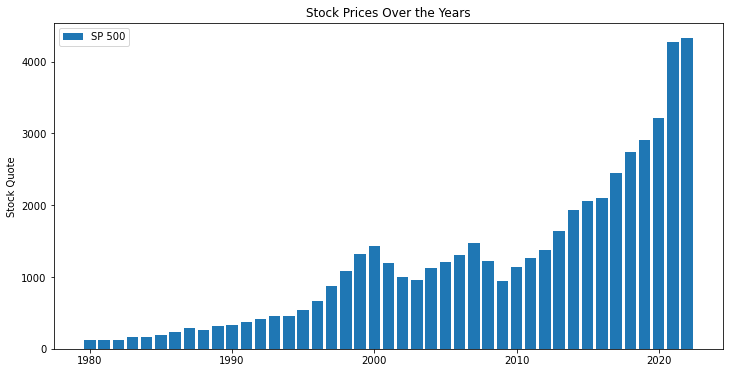

In [55]:
plt.figure(figsize=(12,6))
plt.bar(yearly_price_data['year'], 
        yearly_price_data['SP500'],
        label="SP 500")
plt.title("Stock Prices Over the Years")
plt.ylabel("Stock Quote")
plt.legend()
plt.show()

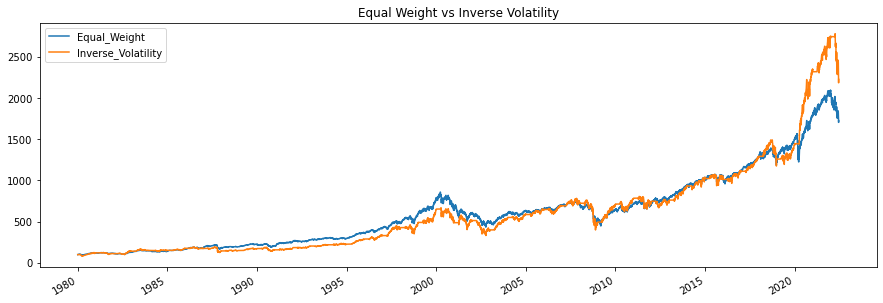

In [56]:
### Applying Strategies over complete Market Data
bt_backtest_equal = bt.Backtest(strategy_lst[0], price_data)
bt_backtest_inv = bt.Backtest(strategy_lst[1], price_data)

bt_results = bt.run(bt_backtest_equal, bt_backtest_inv)

bt_results.plot(title="Equal Weight vs Inverse Volatility")

plt.show()

In [57]:
backtest_stats(bt.run(bt_backtest_equal), strategy_lst[0])
backtest_stats(bt.run(bt_backtest_inv), strategy_lst[1])

<Strategy Equal_Weight>
--------------
Compound annual growth rate: 6.94%
--------------
<Strategy Inverse_Volatility>
--------------
Compound annual growth rate: 7.58%
--------------


## CAGR (Market, Interest Rate & Inflation Rate Strategy)

In this project we completed an extensive analysis comparing the direct market trades and 
Interest based Strategies and Inflation based Strategies.<br/>

### Comparative Study
For Trades with SP500 & Nasdaq, simple strategies
Direct Market Equal Weight Strategy run monthly yields a CAGR of 6.14%<br/>
Inverse Volatility Strategy run weekly yields as CAGR of 6.23%<br/>
Our Strategies has a potential to yield above market returns over a long term and let's plot the final results <br/>
However our interest rate strategy and inflation rate strategy yield better results. Let's plot our data


In [58]:
#interest_rate_strategy_cagr, inflation_rate_strategy_cagr

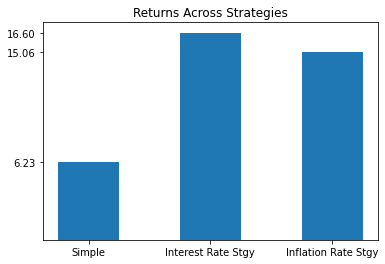

In [59]:
st_returns = [('Simple',6.23),('Interest Rate Stgy',interest_rate_strategy_cagr),('Inflation Rate Stgy',inflation_rate_strategy_cagr)]

labels, ys = zip(*st_returns)
xs = np.arange(len(labels)) 
width = 0.5

plt.title("Returns Across Strategies")
plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)

plt.show()

Our Recommendation is going to be combination strategy across interest rate and inflation rate strategies,
however both of our strategies beats the market rates hands down